In [1]:
import turicreate as tc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = tc.SFrame('home_data/')
data = data.sort(['sqft_living','price'])

In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = tc.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            feature_power = feature.apply(lambda x: x**power)
            poly_sframe[name] = feature_power
            ...
    return poly_sframe

In [4]:
poly1_data = polynomial_sframe(data['sqft_living'], 1)
poly2_data = polynomial_sframe(data['sqft_living'], 2)
poly3_data = polynomial_sframe(data['sqft_living'], 3)

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 24)"

Note that increasing the degree of parallelism also increases the memory footprint.

In [5]:
poly1_data['price'] = data['price']
poly2_data['price'] = data['price']
poly3_data['price'] = data['price']

In [6]:
model_1 = tc.linear_regression.create(poly1_data, target='price', features=['power_1'], validation_set= None)
model_2 = tc.linear_regression.create(poly2_data, target='price', features=['power_2'], validation_set= None)
model_3 = tc.linear_regression.create(poly3_data, target='price', features=['power_3'], validation_set= None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.014087     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.010307     | 7060272.332440     | 251906.559279                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.018132     | 13789409.005921    | 287798.942957                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

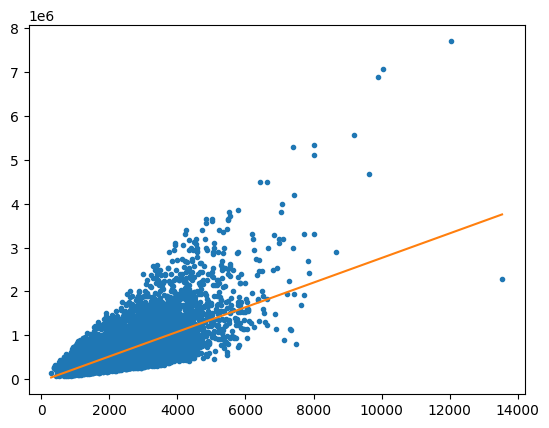

In [7]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
        poly1_data['power_1'], model_1.predict(poly1_data), '-')

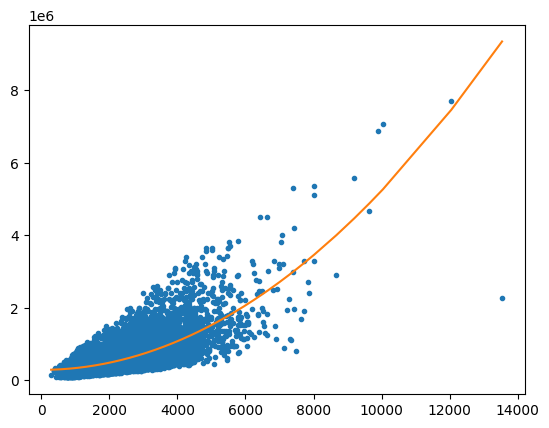

In [38]:
plt.plot(poly2_data['power_1'], poly2_data['price'], '.',
        poly2_data['power_1'], model_2.predict(poly2_data), '-')

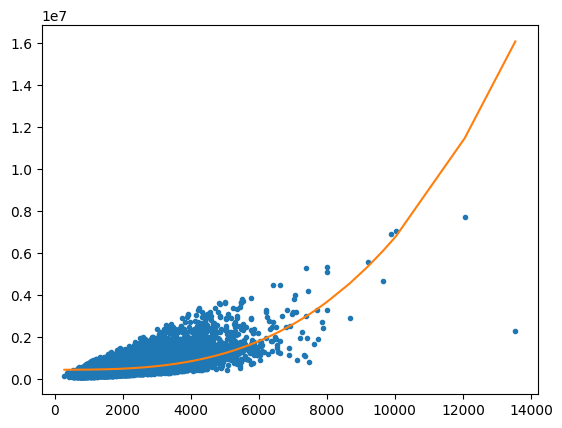

In [39]:
plt.plot(poly3_data['power_1'], poly3_data['price'], '.',
        poly3_data['power_1'], model_3.predict(poly3_data), '-')

In [10]:
poly15_data = polynomial_sframe(data['sqft_living'], 15)

In [11]:
my_features = poly15_data.column_names()
poly15_data['price'] = data['price']

In [12]:
model_15 = tc.linear_regression.create(poly15_data, target='price', features=my_features, validation_set= None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.037296     | 2662308.584339     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [13]:
model_15.coefficients

name,index,value,stderr
(intercept),None,73619.75209426723,531218.7731911921
power_1,None,410.28746257220627,2602.7514119671628
power_2,None,-0.2304507144541707,5.3022209160325025
power_3,None,7.588405425217108e-05,0.005929315648815917
power_4,None,-5.657018026991423e-09,4.052053507387697e-06
power_5,None,-4.570281307109794e-13,1.777535736105067e-09
power_6,None,2.66360206617595e-17,5.07914409168016e-13
power_7,None,3.385847692704749e-21,9.271244878684627e-17
power_8,None,1.1472310406649905e-25,1.0335134284264393e-20
power_9,None,-4.652935866120321e-30,1.0577159343967053e-24


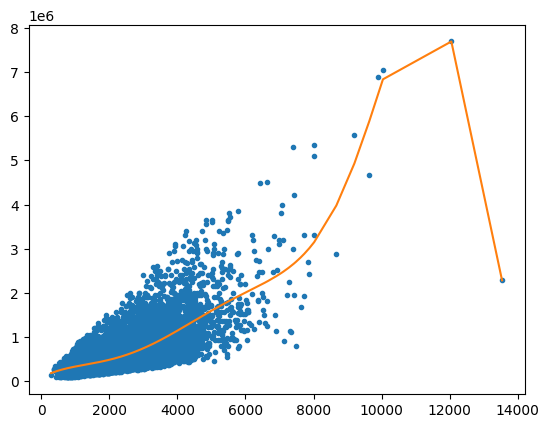

In [40]:
plt.plot(poly15_data['power_1'], poly15_data['price'], '.',
        poly15_data['power_1'], model_15.predict(poly15_data), '-')

In [41]:
s1, s2 = data.random_split(.5, seed=0)

In [16]:
set_1, set_2 = s1.random_split(.5, seed=0)
print(len(set_1), len(set_2))

5404 5398


In [17]:
set_3, set_4 = s2.random_split(.5, seed=0)
print(len(set_3), len(set_4))

5409 5402


In [18]:
poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)

In [19]:
my_features_set_1 = poly15_set_1.column_names()
my_features_set_2 = poly15_set_2.column_names()
my_features_set_3 = poly15_set_3.column_names()
my_features_set_4 = poly15_set_4.column_names()

In [20]:
poly15_set_1['price'] = set_1['price']
poly15_set_2['price'] = set_2['price']
poly15_set_3['price'] = set_3['price']
poly15_set_4['price'] = set_4['price']

In [21]:
set_1_model = tc.linear_regression.create(poly15_set_1, target='price', features=my_features_set_1, validation_set= None)
set_2_model = tc.linear_regression.create(poly15_set_2, target='price', features=my_features_set_2, validation_set= None)
set_3_model = tc.linear_regression.create(poly15_set_3, target='price', features=my_features_set_3, validation_set= None)
set_4_model = tc.linear_regression.create(poly15_set_4, target='price', features=my_features_set_4, validation_set= None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.028792     | 2195218.932305     | 248858.822200                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.036087     | 2069212.978548     | 234840.067186                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.030396     | 2269769.506521     | 251460.072754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.022769     | 2314893.173833     | 244563.136754                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

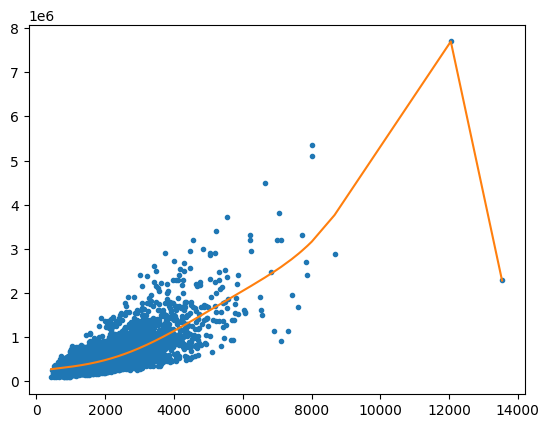

In [22]:
plt.plot(poly15_set_1['power_1'], poly15_set_1['price'], '.',
        poly15_set_1['power_1'], set_1_model.predict(poly15_set_1), '-')

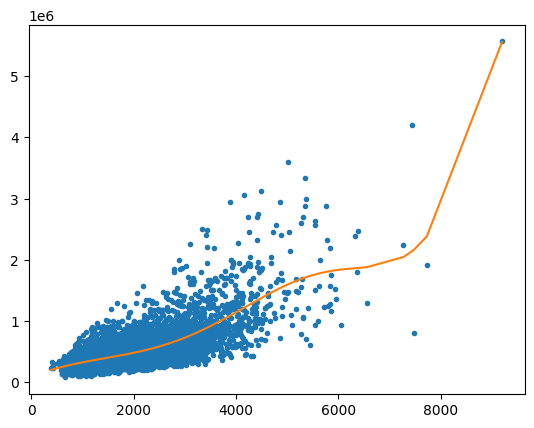

In [23]:
plt.plot(poly15_set_2['power_1'], poly15_set_2['price'], '.',
        poly15_set_2['power_1'], set_2_model.predict(poly15_set_2), '-')

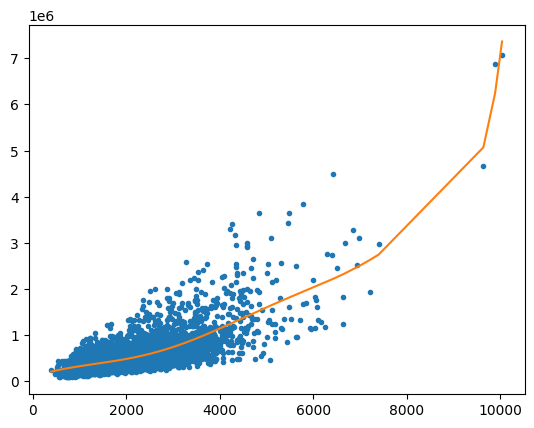

In [24]:
plt.plot(poly15_set_3['power_1'], poly15_set_3['price'], '.',
        poly15_set_3['power_1'], set_3_model.predict(poly15_set_3), '-')

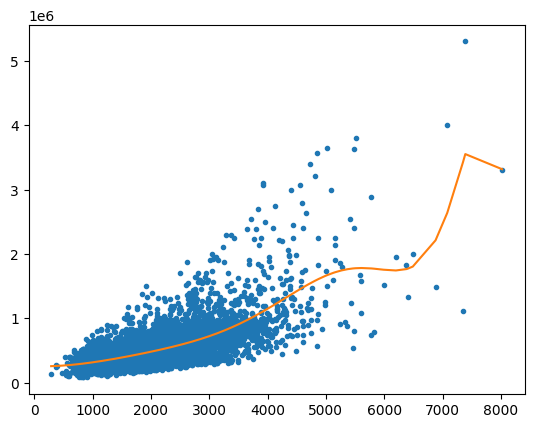

In [25]:
plt.plot(poly15_set_4['power_1'], poly15_set_4['price'], '.',
        poly15_set_4['power_1'], set_4_model.predict(poly15_set_4), '-')

In [26]:
print(set_1_model.coefficients)
print(set_2_model.coefficients)
print(set_3_model.coefficients)
print(set_4_model.coefficients)

+-------------+-------+-------------------------+------------------------+
|     name    | index |          value          |         stderr         |
+-------------+-------+-------------------------+------------------------+
| (intercept) |  None |    223312.75025535823   |   1023516.4205028426   |
|   power_1   |  None |    118.08612757395336   |   4595.428538508215    |
|   power_2   |  None |  -0.047348201124996055  |   8.534782597665973    |
|   power_3   |  None |  3.2531034244069187e-05 |  0.008665610864259638  |
|   power_4   |  None | -3.3237215252839536e-09 |  5.35567363487834e-06  |
|   power_5   |  None |  -9.758304577810272e-14 | 2.1178484462261212e-09 |
|   power_6   |  None |  1.1544030340240345e-17 |  5.45622090832452e-13  |
|   power_7   |  None |  1.0514586942777903e-21 |  9.06259274825857e-17  |
|   power_8   |  None |  3.460496162996619e-26  | 9.036632122856571e-21  |
|   power_9   |  None |  -1.096544539802009e-30 |          nan           |
+-------------+-------+--

## 12. Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?
### - Kyllä


## 13. Quiz Question: True/False the plotted fitted lines look the same in all four plots
### - Tarua

In [27]:
train_and_validation_data, test_data = data.random_split(.9, seed=1)
train_data, validation_data = train_and_validation_data.random_split(.5, seed=1)

In [28]:
def rss(true, predict):
    return sum((true - predict) **2)

In [36]:
rss_value = []
for i in range(1,16):
    data = polynomial_sframe(train_data['sqft_living'], i)
    my_features = data.column_names()
    data['price'] = train_data['price']
    model = tc.linear_regression.create(data, target='price', features=my_features, validation_set=None)
    
    validation = polynomial_sframe(validation_data['sqft_living'], i)
    validation['price'] = validation_data['price']
    rss_value.append(rss(validation['price'], model.predict(validation)))

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.006744     | 4274505.747987     | 262315.114947                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.009104     | 4869005.244131     | 255076.149120                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.012546     | 3271232.649557     | 249640.623557                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 4

Number of unpacked features : 4

Number of coefficients    : 5

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.017694     | 2676547.198434     | 248689.572032                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 6

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.018271     | 2330678.377343     | 248281.665797                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.021406     | 2344070.143292     | 247280.891725                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.022616     | 2452711.310606     | 246772.313122                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 8

Number of unpacked features : 8

Number of coefficients    : 9

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016914     | 2504989.234020     | 246671.859042                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 9

Number of unpacked features : 9

Number of coefficients    : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.018641     | 2525802.177251     | 246663.399621                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 10

Number of unpacked features : 10

Number of coefficients    : 11

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.020312     | 2532693.511978     | 246670.636994                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 11

Number of unpacked features : 11

Number of coefficients    : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.022296     | 2534201.088398     | 246675.476971                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 12

Number of unpacked features : 12

Number of coefficients    : 13

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.024017     | 2534257.195241     | 246676.033273                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 13

Number of unpacked features : 13

Number of coefficients    : 14

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.027653     | 2534342.869093     | 246674.389430                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 14

Number of unpacked features : 14

Number of coefficients    : 15

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.026947     | 2534786.244129     | 246672.360649                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.026569     | 2535496.382163     | 246670.782977                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [37]:
rss_value

[676709775198045.8,
 607090530698013.4,
 616714574532766.4,
 609129230654382.4,
 599177138583566.5,
 589182477809309.6,
 591717038417923.8,
 601558237778713.6,
 612563853984174.8,
 621744288938964.1,
 627012012709251.2,
 627757914771689.1,
 624738503273945.4,
 619369705899050.9,
 613089202403304.4]

## 16. Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?
### - 2

In [ ]:
poly_test_data = polynomial_sframe(test_data['sqft_living'], 2)

In [ ]:
poly_test_data['price'] = test_data['price']

In [ ]:
test_model = tc.linear_regression.create(poly_test_data, target='price', features=['power_2'], validation_set=None)

In [ ]:
rss(poly_test_data['price'], test_model.predict(poly_test_data))

## 18. Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? 
### - 126685559560062.14